In [15]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-14 18:04:23,799: Credentials are already in use. The existing account in the session will be replaced.


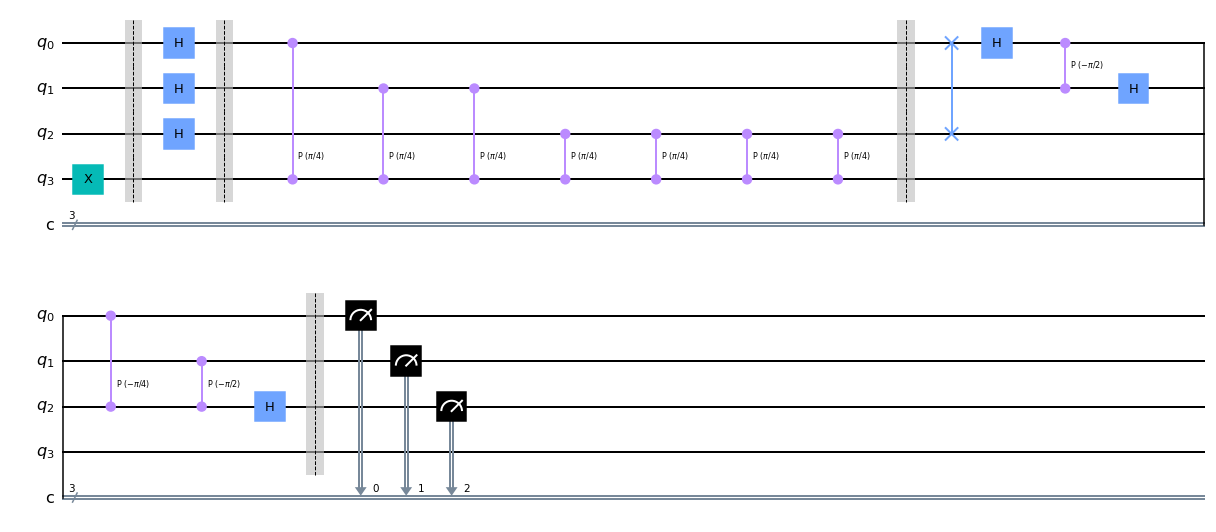

In [13]:
n = 3

qpe = QuantumCircuit(4,3)

qpe.x(3)
qpe.barrier()

for i in range(3):
    qpe.h(i)
    
qpe.barrier()

for i in range(3):
    for j in range( int(2 ** i) ):
        qpe.cp(np.pi / 4, i, 3)

qpe.barrier()

# Now the inverse QFT:
for i in range(int(n/2)):
    qpe.swap(i, n - i - 1)

for i in range(n):
    for j in range(i):
        qpe.cp(-np.pi/float(2**(i-j)), j, i)
    qpe.h(i)

qpe.barrier()

for i in range(n):
    qpe.measure(i,i)

qpe.draw()

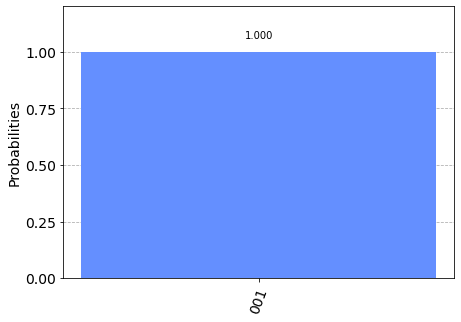

In [16]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)